In [6]:
%%writefile requirements.txt
numpy
pandas==2.2.3
pyyaml==6.0.2
matplotlib==3.10.0
scikit-learn==1.6.1
tqdm==4.67.1
ipykernel
import_ipynb

Overwriting requirements.txt


In [7]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import numpy.typing as npt
import pandas as pd
import yaml
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import SplineTransformer
from sklearn.calibration import CalibratedClassifierCV

import import_ipynb
import final_preprocessing_data

Overwriting requirements.txt
Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of 

<string>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<string>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform 

In [2]:
X_train = pd.read_csv("X_train_scaled.csv")
X_test  = pd.read_csv("X_test_scaled.csv")
y_train = pd.read_csv("y_train.csv")["Loan Status"]
y_test  = pd.read_csv("y_test.csv")["Loan Status"]

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

X_train: (71828, 26) X_test: (17957, 26)
y_train: (71828,) y_test: (17957,)


In [ ]:
# Initialize the logistic regression model
model = LogisticRegression(penalty = "l2", C = 1.0, random_state = 16, solver='liblinear', max_iter=1000)
    
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=16, solver='liblinear')

In [8]:
y_prob = model.predict_proba(X_test)[:, 1]   # probabilities in [0,1]
y_pred = (y_prob >= 0.5).astype(int)         # choose your threshold

In [ ]:
#Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
num = conf_matrix[0][0]+conf_matrix[1][1]
denom = conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1]
print(num/denom)

0.8000222754357632
Confusion Matrix Accuracy: 0.8000222754357632


In [19]:
#Calculate precision
precision = metrics.precision_score(y_test, y_pred)
print(precision)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
num = conf_matrix[1][1]
denom = conf_matrix[1][1]+conf_matrix[0][1]
print(num/denom)

0.7898986327204149
0.7898986327204149


In [20]:
#Calculate recall
recall = metrics.recall_score(y_test,y_pred)
print(recall)

num = conf_matrix[1][1]
denom = conf_matrix[1][1]+conf_matrix[1][0]
print(num/denom)

0.9980638915779284
0.9980638915779284


In [ ]:
#Calculate average precision
average_precision = metrics.average_precision_score(y_test, y_pred)
print(average_precision)

0.7898172066496308
0.8818633417771491


In [ ]:
#Calculate F1 score
f1_score = metrics.f1_score(y_test, y_pred)
print(f1_score)

f1 = 2*precision*recall/(precision+recall)
print(f1)

0.8818633417771491
0.8818633417771491


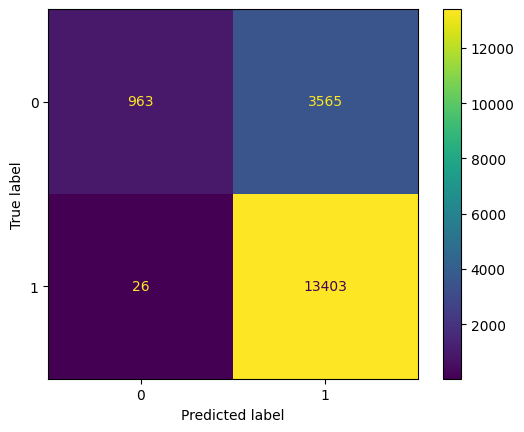

In [ ]:
#Calculate specificity
num = conf_matrix[0][0]
denom = conf_matrix[0][0]+conf_matrix[0][1]
print(num/(denom))

#Visualize confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [24]:
#Calculate ROC score
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)


AUROC: 0.7543995781241324


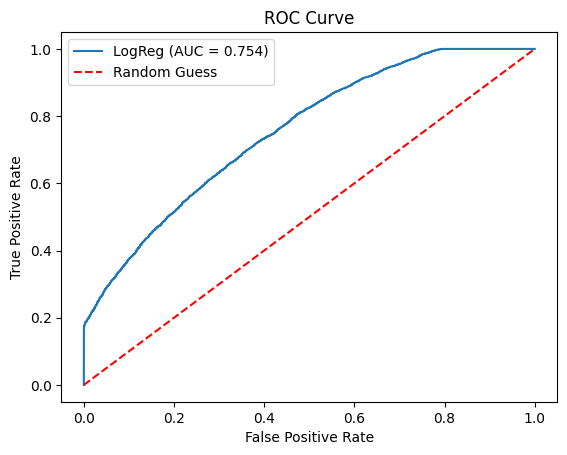

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

auroc = roc_auc_score(y_test, y_prob)
print("AUROC:", auroc)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"LogReg (AUC = {auroc:.3f})")
plt.plot([0,1],[0,1],'r--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

0.605370285011579


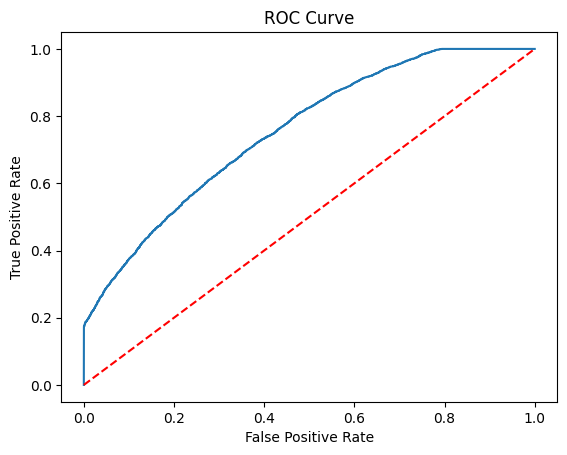

In [82]:
#Calculate AUROC score
auroc = metrics.roc_auc_score(y_test, y_pred, labels = [-1,1])
print(auroc)

#Visualize ROC curve/AUROC score
plt.title('ROC Curve')
plt.plot(fpr, tpr, label = f'{model} (AUC = {auroc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()